In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import requests
import json
from config import API_Key
import random


In [2]:
all_cities=pd.read_csv("Data/worldcities.csv")
all_cities=all_cities[['City','Latitude','Longitude']]
all_cities=all_cities.sort_values(by=['Latitude'])

In [3]:
all_cities_north=all_cities.query("Latitude >=0")
all_cities_north=all_cities_north.reset_index(drop=True)
all_cities_north

,City,Latitude,Longitude
0,nanyuki,0.016667,37.066667
1,macapa,0.033333,-51.050000
2,nyahururu,0.033333,36.366667
3,meru,0.050000,37.650000
4,eldama ravine,0.050000,35.716667
...,...,...,...
41888,dikson,73.506944,80.546389
41889,narsaq,77.302500,-68.842500
41890,qaanaaq,77.489444,-69.332222
41891,barentsburg,78.066667,14.233333


In [4]:
all_cities_south=all_cities.query("Latitude < 0")
all_cities_south=all_cities_south.reset_index(drop=True)
all_cities_south

,City,Latitude,Longitude
0,ushuaia,-54.800000,-68.300000
1,punta arenas,-53.150000,-70.916667
2,rio gallegos,-51.622613,-69.218127
3,bluff,-46.600000,168.333333
4,invercargill,-46.400000,168.350000
...,...,...,...
4934,lukaya,-0.113056,31.853889
4935,kisumu,-0.100000,34.750000
4936,booue,-0.100000,11.933333
4937,sembabule,-0.077222,31.456667


In [5]:
rng=default_rng()
random_north=rng.choice(41893,size=250,replace=False)
random_south=rng.choice(4939,size=250,replace=False)
print(random_north)
print(random_south)

[33551 33543 24051 18751 17692 36323 14974 40705 34852 30834  5530  9863
   134 13028 36169 26869 38647 27228 10837 12362 35857 17550 18048  1691
 33910 17246 26282  7276 17145 13777 18052 19616 39963 14615 38627 12051
  9588 37166 24089  7278 24606 37583 36037 26397 38735 20661 34983 35360
 14634 14005  1002 19945 40563 37093 24313 38196  2791 37585 23015 34656
  8236 25085 27074 36160 19331 12026  2014  8997  6429  4097  1136 37926
  5220 10721  1124 27531 23721 32833  9765 17020  7052 21211 40285 17640
 28356 13718 21896  6864  1072 38253 33670 13526 35969  6724  4118 24634
 16650 41733 24132  1381 35625 26443 20375  1854 28175 39679 13088 36385
 17098 39295 22707  8172 11640  3775 25437 17072 28288 26325 26979  9120
 38665 38491 22791 20479 32311  3593 16042 29208 12444 16277 26944 25826
  6760 16684 41379  1306 29152 24060 12115 14254 28089 15436  6500 34781
 14598  2578 28401  6381 34840 38811 37203 34014 29773 39106 24124 33786
 14281 31134 39415  9789  6822  2346 21878 35240  4

In [8]:
random_cities_north=all_cities_north[all_cities_north.index.isin(random_north)]
random_cities_south=all_cities_south[all_cities_south.index.isin(random_south)]
frames=[random_cities_north,random_cities_south]
random_cities=pd.concat(frames)
random_cities=random_cities.reset_index(drop=True)
random_cities

,City,Latitude,Longitude
0,mallama,1.137396,-77.848901
1,santa barbara,2.450069,-77.979357
2,mosquera,2.508610,-78.451102
3,pacora,5.527084,-75.459301
4,foso,5.700000,-1.283333
...,...,...,...
495,nakuru,-0.283333,36.066667
496,santo domingo,-0.250000,-79.150000
497,quito,-0.216667,-78.500000
498,puerto leguizamo,-0.193368,-74.781886


In [9]:
random_cities.to_csv("Data/500_Random_Cities.csv",index=False)

In [10]:
random_cities=pd.read_csv("Data/500_Random_Cities.csv")
random_cities

,City,Latitude,Longitude
0,mallama,1.137396,-77.848901
1,santa barbara,2.450069,-77.979357
2,mosquera,2.508610,-78.451102
3,pacora,5.527084,-75.459301
4,foso,5.700000,-1.283333
...,...,...,...
495,nakuru,-0.283333,36.066667
496,santo domingo,-0.250000,-79.150000
497,quito,-0.216667,-78.500000
498,puerto leguizamo,-0.193368,-74.781886


In [11]:
#get weather data for each of the cities and store the useful information back into the dictionary
random_cities=pd.read_csv("Data/500_Random_Cities.csv")
cities={}
n=1
for i in range(0,500) :
    city=random_cities.loc[i,'City']
    print(f"City {n}: {city}")
    cities[city]={}
    lat=random_cities.loc[i,'Latitude']
    lon=random_cities.loc[i,'Longitude']
    url=f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_Key}&units=imperial"
    weather_data=requests.get(url).json()
    cities[city]['Latitude']=lat
    cities[city]['Longitude']=lon
    cities[city]['Temperature']=weather_data['main']['temp']
    cities[city]['Humidity']=weather_data['main']['humidity']
    cities[city]['Cloudiness']=weather_data['clouds']['all']
    cities[city]['Wind Speed']=weather_data['wind']['speed']
    n+=1


City 1: mallama
City 2: santa barbara
City 3: mosquera
City 4: pacora
City 5: foso
City 6: taluya
City 7: tunggol
City 8: lapuan
City 9: lambontong
City 10: san joaquin
City 11: igpit
City 12: cerrito
City 13: landang
City 14: labuan
City 15: sibuco
City 16: ikire
City 17: assela
City 18: aurora
City 19: ayapel
City 20: coloncito
City 21: san jose
City 22: chivacoa
City 23: inayagan
City 24: cabungahan
City 25: clemencia
City 26: anaimalai
City 27: villanueva
City 28: pancol
City 29: fulacunda
City 30: kano
City 31: zorgo
City 32: marandahalli
City 33: san agustin
City 34: carmen
City 35: bigaa
City 36: sabang
City 37: suchitoto
City 38: tera
City 39: mao
City 40: santa elena
City 41: bitangan
City 42: biltine
City 43: kaeng khoi
City 44: malanday
City 45: san pedro sacatepequez
City 46: surin
City 47: zacualpa
City 48: el perico
City 49: paitan
City 50: raichur
City 51: ndioum
City 52: letpadan
City 53: santa rosalia
City 54: road town
City 55: tecamachalco
City 56: phayao
City 57: ul

In [12]:
cities_df=pd.DataFrame.from_dict(cities,orient='index')
cities_df.to_csv("Data/City_Weather.csv")
cities_df

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
mallama,1.137396,-77.848901,51.19,95,75,3.98
santa barbara,-19.933333,-43.400000,55.65,93,20,1.03
mosquera,2.508610,-78.451102,78.19,85,100,14.32
pacora,5.527084,-75.459301,54.84,97,73,2.73
foso,5.700000,-1.283333,71.40,99,100,1.74
...,...,...,...,...,...,...
nakuru,-0.283333,36.066667,55.56,87,88,4.90
santo domingo,-0.250000,-79.150000,68.41,95,96,1.39
quito,-0.216667,-78.500000,50.02,94,75,3.44
puerto leguizamo,-0.193368,-74.781886,70.74,99,76,0.94


In [13]:
cities_df=pd.read_csv("Data/City_Weather.csv",index_col=0)
cities_df=cities_df.reset_index()
cities_df

,index,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,mallama,1.137396,-77.848901,51.19,95,75,3.98
1,santa barbara,-19.933333,-43.400000,55.65,93,20,1.03
2,mosquera,2.508610,-78.451102,78.19,85,100,14.32
3,pacora,5.527084,-75.459301,54.84,97,73,2.73
4,foso,5.700000,-1.283333,71.40,99,100,1.74
...,...,...,...,...,...,...,...
492,nakuru,-0.283333,36.066667,55.56,87,88,4.90
493,santo domingo,-0.250000,-79.150000,68.41,95,96,1.39
494,quito,-0.216667,-78.500000,50.02,94,75,3.44
495,puerto leguizamo,-0.193368,-74.781886,70.74,99,76,0.94


Observations of the scatter plot below, exploring the dependent variable temperature vs. dependent variable Latitude:
As the latitude approaches 0 from either end, the temperature tends to increase
Some variation in temperature at each latitude is likely caused by some cities being measured in the day and some at night.
The overall shape of the relationship is parabolic


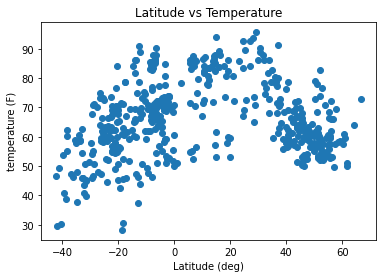

In [14]:
plt.scatter(cities_df['Latitude'],cities_df['Temperature'])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude (deg)")
plt.ylabel("temperature (F)")
plt.show
plt.savefig("Charts/LatVTemp.png")
print("Observations of the scatter plot below, exploring the dependent variable temperature vs. dependent variable Latitude:")
print("As the latitude approaches 0 from either end, the temperature tends to increase")
print("Some variation in temperature at each latitude is likely caused by some cities being measured in the day and some at night.")
print("The overall shape of the relationship is parabolic")

Obersvations of Latitude v Humidity:
Near the equator and near the poles there are no cities measured with low humidity compared to those at latitudes in between
There is far more variation in humidity measured in cities between the Tropic of Cancer and the Arctic circle, and the Topic of Capricorn and the Antarctic circle.


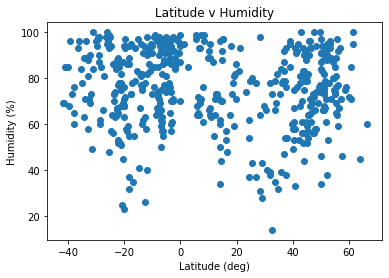

In [15]:
plt.scatter(cities_df['Latitude'],cities_df['Humidity'])
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("Charts/LatVHumid.png")
print("Obersvations of Latitude v Humidity:")
print("Near the equator and near the poles there are no cities measured with low humidity compared to those at latitudes in between")
print("There is far more variation in humidity measured in cities between the Tropic of Cancer and the Arctic circle, and the Topic of Capricorn and the Antarctic circle.")

Observations of Latitude v Cloudiness
There does not appear to be any relationship between cloudiness and latitude.
There is a large variation of cloudiness measured for cities at all latitudes.


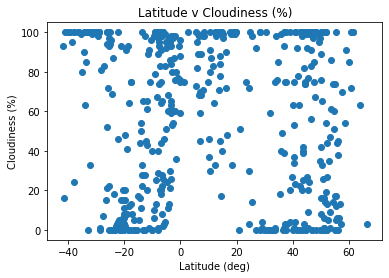

In [16]:
plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'])
plt.title("Latitude v Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("Charts/LatVCloudiness.png")
print("Observations of Latitude v Cloudiness")
print("There does not appear to be any relationship between cloudiness and latitude.")
print("There is a large variation of cloudiness measured for cities at all latitudes.")

Observations of Latitude v Wind Speed:
There does not appear to be a relationship between latitude and wind speed.


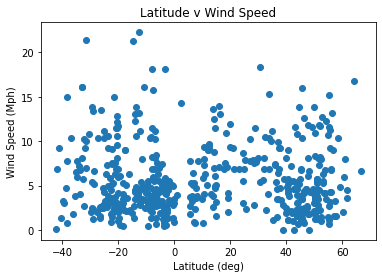

In [17]:
plt.scatter(cities_df['Latitude'],cities_df['Wind Speed'])
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (Mph)")
plt.show
plt.savefig("Charts/LatVWindSpeed.png")
print("Observations of Latitude v Wind Speed:")
print("There does not appear to be a relationship between latitude and wind speed.")

In [18]:
cities_southern=cities_df.query("Latitude<0")
cities_southern


,index,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,santa barbara,-19.933333,-43.400000,55.65,93,20,1.03
105,frankfort,-27.266667,28.483333,48.02,81,83,10.33
250,reefton,-42.116667,171.866667,46.78,69,93,0.11
251,calbuco,-41.768011,-73.127296,29.41,69,16,6.87
252,lower hutt,-41.216667,174.916667,49.24,85,100,9.22
...,...,...,...,...,...,...,...
492,nakuru,-0.283333,36.066667,55.56,87,88,4.90
493,santo domingo,-0.250000,-79.150000,68.41,95,96,1.39
494,quito,-0.216667,-78.500000,50.02,94,75,3.44
495,puerto leguizamo,-0.193368,-74.781886,70.74,99,76,0.94


In [19]:
cities_northern=cities_df.query("Latitude >= 0")
cities_northern

,index,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,mallama,1.137396,-77.848901,51.19,95,75,3.98
2,mosquera,2.508610,-78.451102,78.19,85,100,14.32
3,pacora,5.527084,-75.459301,54.84,97,73,2.73
4,foso,5.700000,-1.283333,71.40,99,100,1.74
5,taluya,5.811667,125.172778,86.22,64,95,3.69
...,...,...,...,...,...,...,...
245,sakyla,61.033333,22.333333,59.52,85,100,8.01
246,vylgort,61.622833,50.757300,50.04,100,100,4.47
247,ust-kulom,61.686359,53.690205,50.99,95,100,3.58
248,artyk,64.200000,145.100000,63.90,45,63,16.73


There is a nagative linear relationship between temperature and latitude for the northern hemisphere.


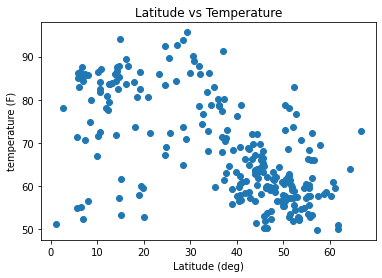

In [20]:
plt.scatter(cities_northern['Latitude'],cities_northern['Temperature'])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude (deg)")
plt.ylabel("temperature (F)")
plt.show
plt.savefig("Charts/NORTHLatVTemp.png")
print("There is a nagative linear relationship between temperature and latitude for the northern hemisphere.")

There is a positive linear relationship between latitude and temperature for the southern hemisphere.


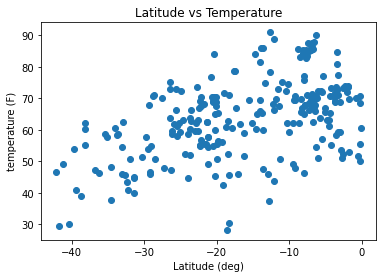

In [21]:
plt.scatter(cities_southern['Latitude'],cities_southern['Temperature'])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude (deg)")
plt.ylabel("temperature (F)")
plt.show
plt.savefig("Charts/SOUTHLatVTemp.png")
print("There is a positive linear relationship between latitude and temperature for the southern hemisphere.")

There does not appear to be a linear association between latitude and humidy in the northern hemisphere.
Hoever, near the equator and the poles the data does not show any locations with low humidity.


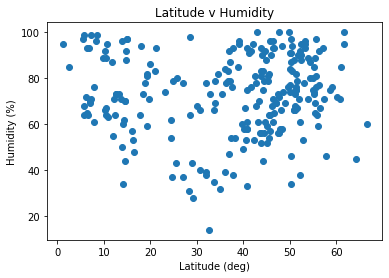

In [22]:
plt.scatter(cities_northern['Latitude'],cities_northern['Humidity'])
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("Charts/NORTHLatVHumid.png")
print("There does not appear to be a linear association between latitude and humidy in the northern hemisphere.")
print("Hoever, near the equator and the poles the data does not show any locations with low humidity.")

There does not appear to be a linear association between latitude and humidy in the southern hemisphere.
Hoever, near the equator and the poles the data does not show any locations with low humidity.


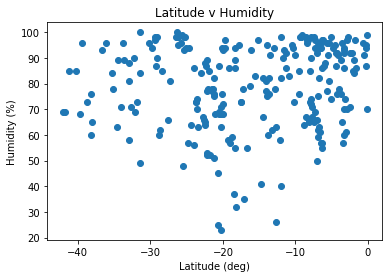

In [23]:
plt.scatter(cities_southern['Latitude'],cities_southern['Humidity'])
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig("Charts/SOUTHLatVHumid.png")
print("There does not appear to be a linear association between latitude and humidy in the southern hemisphere.")
print("Hoever, near the equator and the poles the data does not show any locations with low humidity.")

There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.


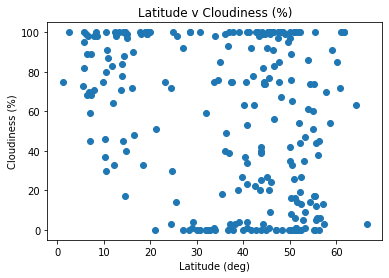

In [24]:
plt.scatter(cities_northern['Latitude'],cities_northern['Cloudiness'])
plt.title("Latitude v Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("Charts/NORTHLatVCloud.png")
print("There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.")

There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.


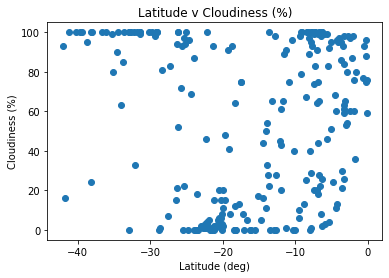

In [25]:
plt.scatter(cities_southern['Latitude'],cities_southern['Cloudiness'])
plt.title("Latitude v Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.show
plt.savefig("Charts/SOUTHLatVCloud.png")
print("There does not appear to be any relationship between latitude and cloudiness in the northern hemisphere.")

There does not appear to be any relationship between latitude and wind speed in the northern hemisphere.


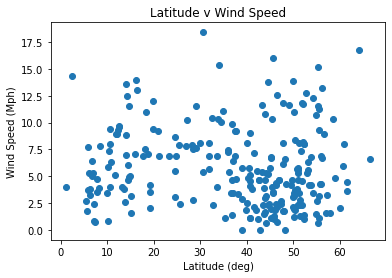

In [26]:
plt.scatter(cities_northern['Latitude'],cities_northern['Wind Speed'])
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (Mph)")
plt.show
plt.savefig("Charts/NORTHLatVWindSpeed.png")
print("There does not appear to be any relationship between latitude and wind speed in the northern hemisphere.")

There does not appear to be any relationship between latitude and wind speed in the southern hemisphere.


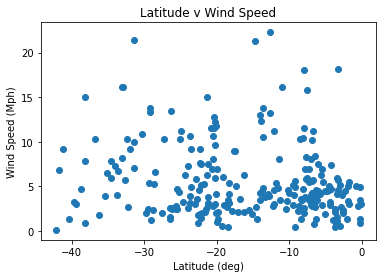

In [27]:
plt.scatter(cities_southern['Latitude'],cities_southern['Wind Speed'])
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (Mph)")
plt.show
plt.savefig("Charts/SOUTHLatVWindSpeed.png")
print("There does not appear to be any relationship between latitude and wind speed in the southern hemisphere.")